In [1]:
import pandas as pd
import numpy as np

In [ ]:
# I have saved the cleaned data from model building notebook, I am reading the same for further analysis

In [8]:
#Read training Data
col=['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_category',
       'customer_active_segment1', 'customer_active_segment2',
       'customer_active_segment3', 'X11', 'X12', 'X13']
customer_train = pd.read_csv(r'C:\Users\JaisoN\Desktop\Amazon\customer_train_clean.csv',usecols=col)
df_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment1,customer_active_segment2,customer_active_segment3,X11,X12,X13
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,179.04674,-129.995640,-168.77083,-251.65633,248.76973,-240.30392
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,179.04674,-129.995640,-168.77083,-250.04515,228.02208,-221.80354
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,179.04674,-129.995640,-168.77083,-270.22327,246.30443,-249.93185
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,134.26762,-106.959984,-133.30763,-251.65633,248.76973,-240.30392
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,179.04674,-129.995640,-168.77083,-238.17957,231.24010,-213.63986


In [9]:
#Read testing data
col=['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment1',
       'customer_active_segment2', 'customer_active_segment3', 'X11', 'X12',
       'X13']
customer_test = pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\customer_test_clean.csv",usecols=col)
df_test.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment1,customer_active_segment2,customer_active_segment3,X11,X12,X13
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,19.301294,-6.221495,19.128714,41.199245,41.669056,25.599594
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,19.301294,-6.221495,19.128714,30.154392,22.535347,13.963779
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,19.301294,-6.221495,19.128714,30.154392,22.535347,13.963779
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,19.301294,-6.221495,19.128714,41.199245,41.669056,25.599594
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,17.789865,-18.398910,8.082990,41.199245,41.669056,25.599594


In [10]:
# Lets do some Feature Engineering 

# We need to determine the feature_importance  using InMemoryModel

In [12]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
X=customer_train.drop('customer_category',axis=1)
y=customer_train['customer_category']

In [ ]:
# According to our model prediction LogisticRegression is the best algorithm for Amazon data

# Here I am using the best parameters which I got from Bayesian Hyper parameter tuning, to gett the most accurate values 

In [18]:
%%time

from sklearn.linear_model import LogisticRegression
#xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,objective='binary:logistic', random_state=42)
LR = LogisticRegression(**{'C': 56, 'class_weight': None, 'penalty': 'l2'})

LR.fit(X, y)

Wall time: 367 ms


E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=56)

In [ ]:
# Lets ploat the feature importance

In [19]:
X=customer_test
y=LR.predict(customer_test)

LR.fit(X,y)

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=56)

[14/14] features ████████████████████ Time elapsed: 1 seconds

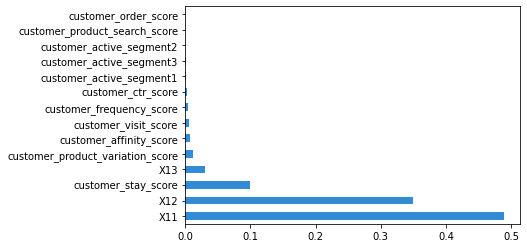

In [20]:
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(LR.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [48]:
LR.classes_

array([0, 1], dtype=int64)

[6/6] grid cells ████████████████████ Time elapsed: 5 seconds

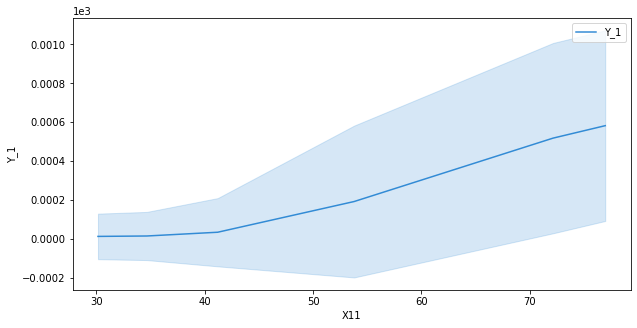

In [24]:
pyint_model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X11'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))


[6/6] grid cells ████████████████████ Time elapsed: 4 seconds

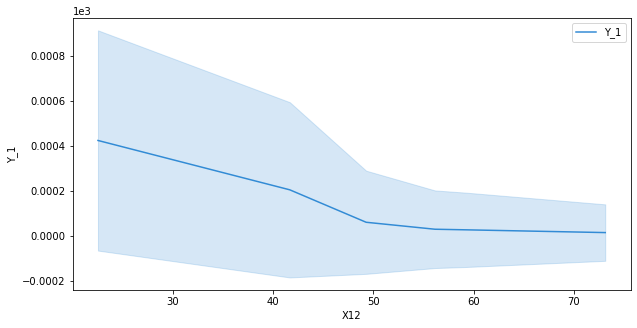

In [25]:
pyint_model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X12'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))


[6/6] grid cells ████████████████████ Time elapsed: 5 seconds

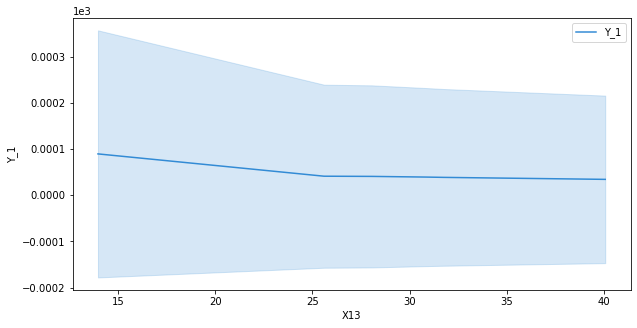

In [26]:
pyint_model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X13'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))


[30/30] grid cells ████████████████████ Time elapsed: 5 seconds

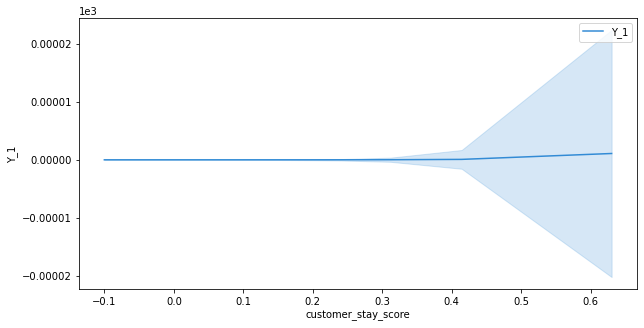

In [28]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['customer_stay_score'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[100/100] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 2 Axes>,

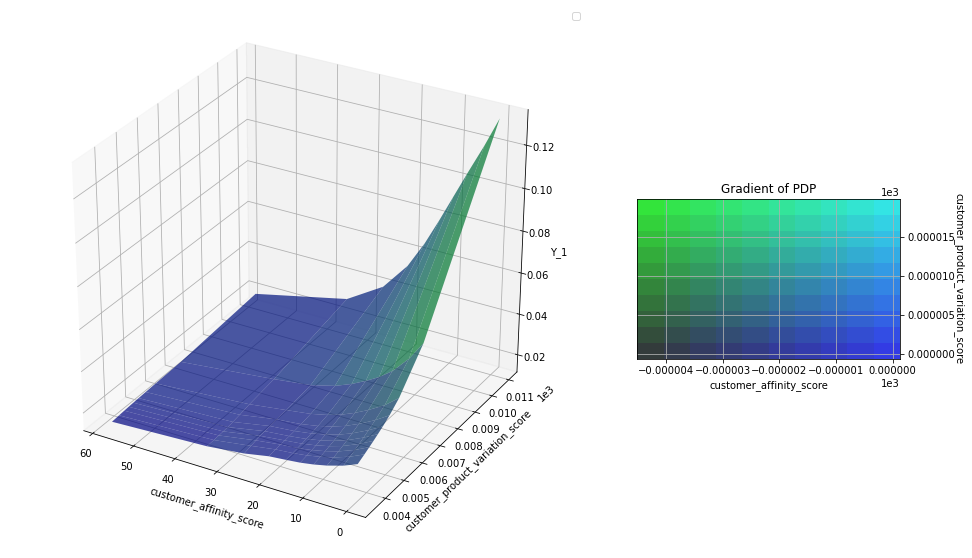

In [29]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_affinity_score', 'customer_product_variation_score')], model, 
                                                       grid_resolution=10)

[36/36] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 2 Axes>,

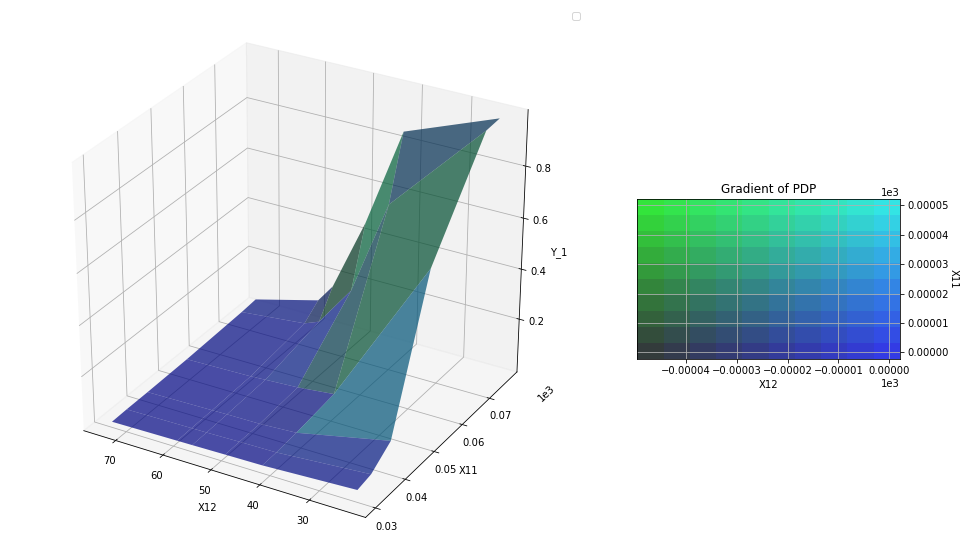

In [47]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('X12', 'X11')], model, 
                                                       grid_resolution=10)

[100/100] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 2 Axes>,

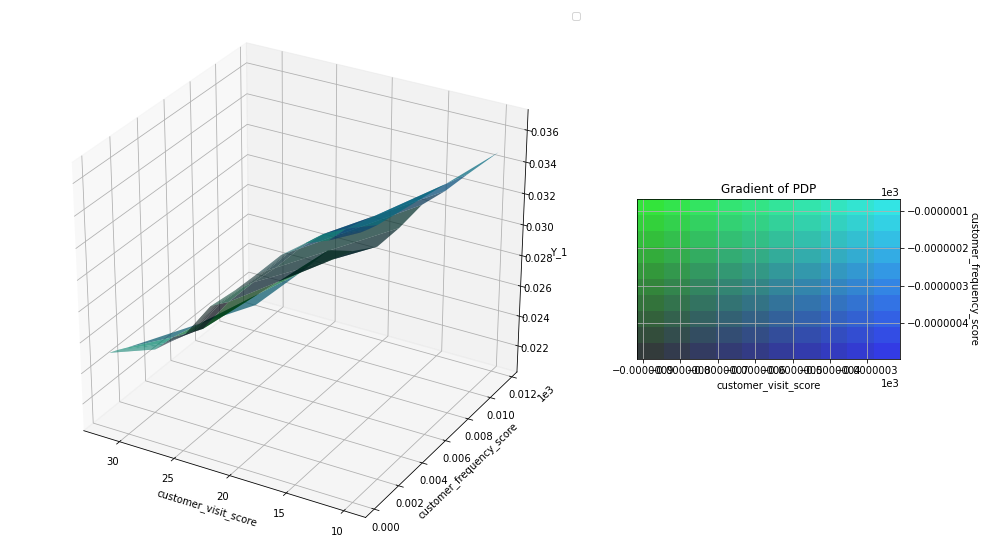

In [31]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_visit_score', 'customer_frequency_score')], model, 
                                                       grid_resolution=10)

[100/100] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

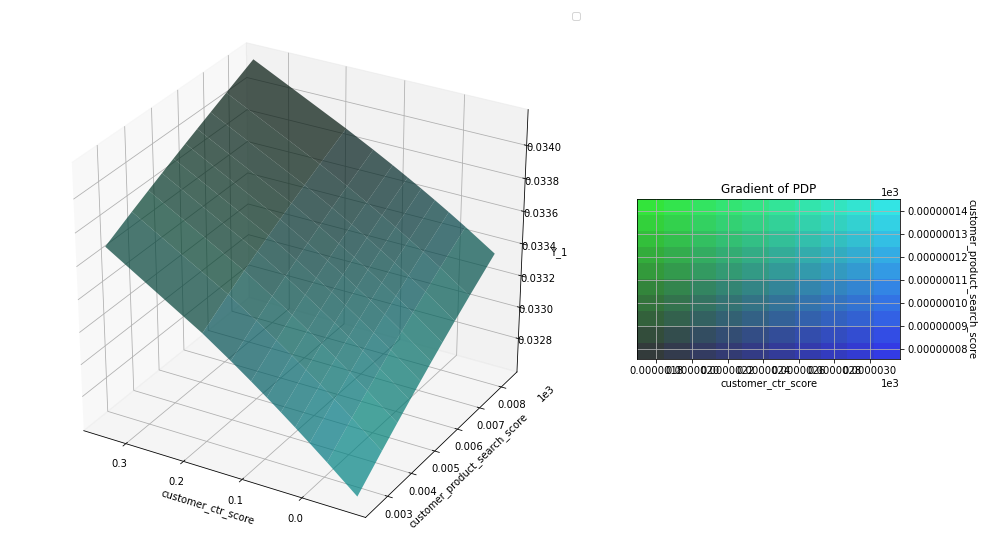

In [32]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_ctr_score', 'customer_product_search_score')], model, 
                                                       grid_resolution=10)

[36/36] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 2 Axes>,

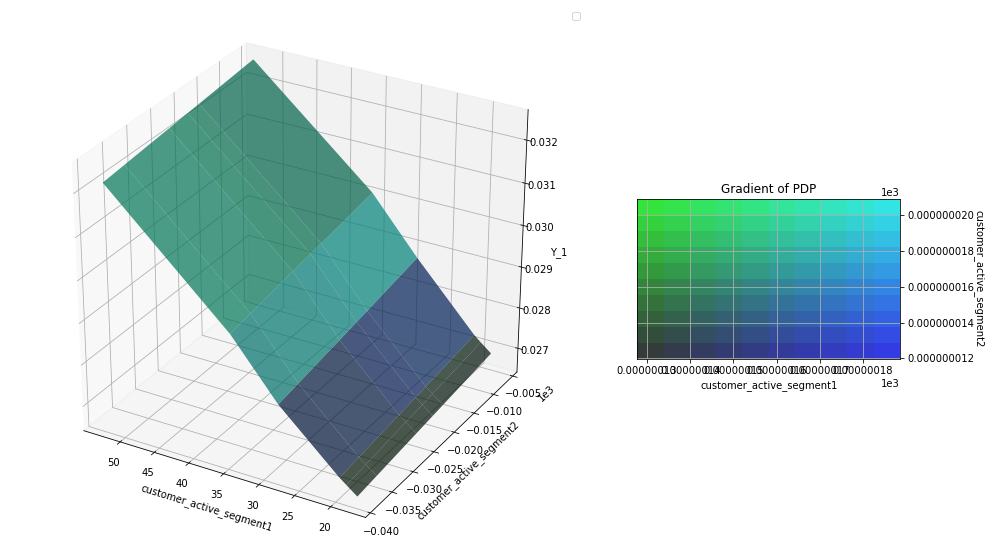

In [33]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_active_segment1', 'customer_active_segment2')], model, 
                                                       grid_resolution=10)

[100/100] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

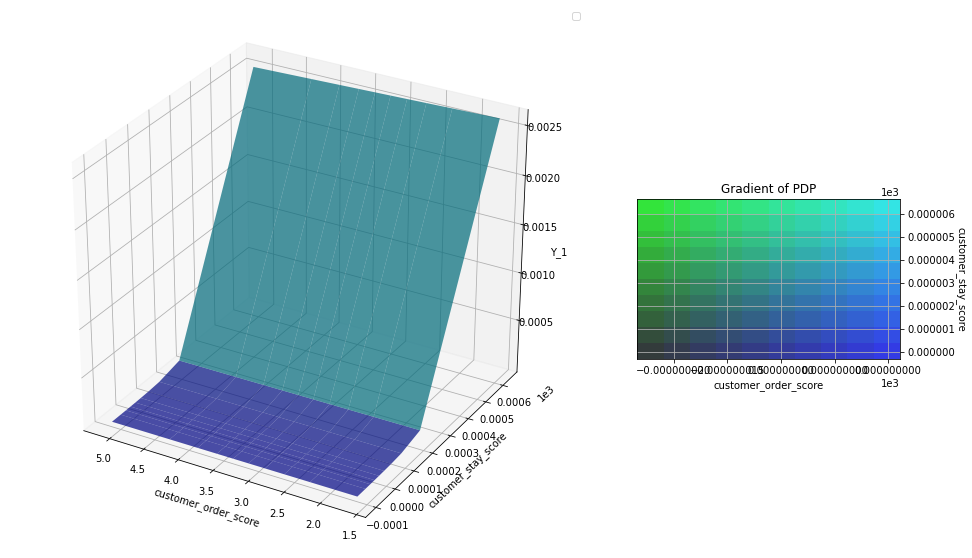

In [35]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_order_score','customer_stay_score')], model, 
                                                       grid_resolution=10)

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\skater\data\datamanager.py:152: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  grid = np.array(grid)


[60/60] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 2 Axes>,

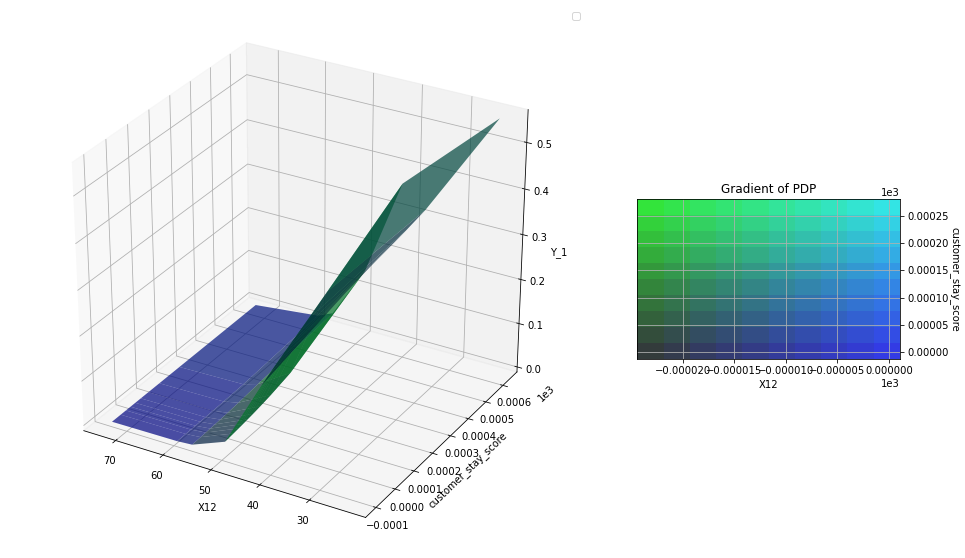

In [49]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('X12','customer_stay_score')], model, 
                                                       grid_resolution=10)

In [41]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
#from skater.util.dataops import show_in_notebook
exp = LimeTabularExplainer(X.values, 
                           feature_names=X.columns, 
                           discretize_continuous=True, 
                           class_names=['Y_1', 'Y_0'])
exp.explain_instance(X.iloc[10].values, LR.predict_proba).show_in_notebook()

In [27]:
X.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment1',
       'customer_active_segment2', 'customer_active_segment3', 'X11', 'X12',
       'X13'],
      dtype='object')